In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/alongeandrews/Desktop/Data Sets/CDC/table005.xlsx')

In [3]:
df.iat[2,0] = "Year"
df.iloc[2] = df.iloc[2].str[:4]
df = df.rename(columns=df.iloc[2])
df = df.drop(df.index[2])
df = df.iloc[3:-3]

df.insert(0,'Category','')

df['Category'].loc[1:22]= "All Persons"
df['Category'].loc[24:43]= "Male"
df['Category'].loc[45:64]= "Female"
df['Category'].loc[66:84]= "White"
df['Category'].loc[86:104]= "Black"
df['Category'].loc[106:124]= "American Indian"
df['Category'].loc[126:145]= "Asian or Pacific Islander"
df['Category'].loc[146:165]= "Hispanic or Latino"
df['Category'].loc[166:185]= "White not Hispanic"
df['Category'].loc[186:210]= "Black not Hispanic"

df = df.set_index(['Category','Year'])

df = df.transpose()

df = df.dropna(how = 'all')

df = df.replace('- - -','NaN')
df = df.replace('...','NaN')

df = df.iloc[0:41].astype(float)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
#df

In [5]:
#df.dtypes

In [6]:
#df.to_excel(r'/Users/alongeandrews/Desktop/Clean Draft6.xlsx')

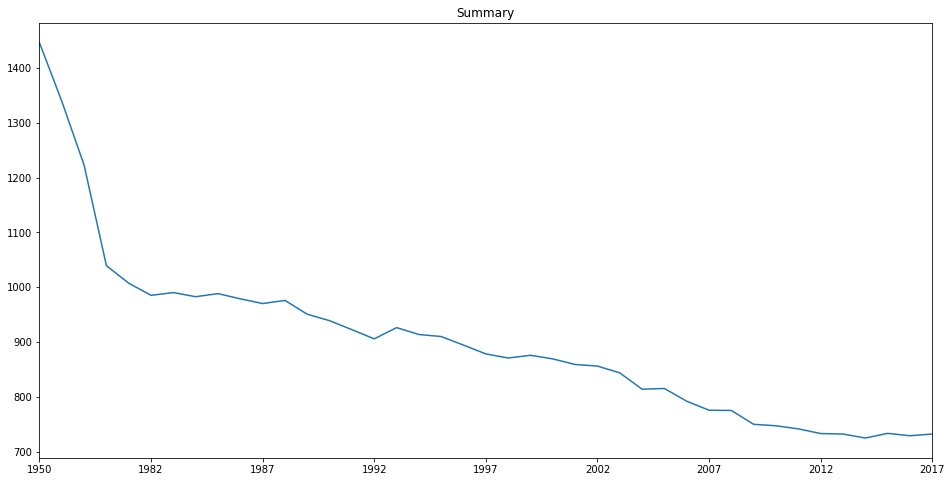

In [7]:
ax = df['All Persons','All causes'].plot(title = "Summary", figsize=(16,8))

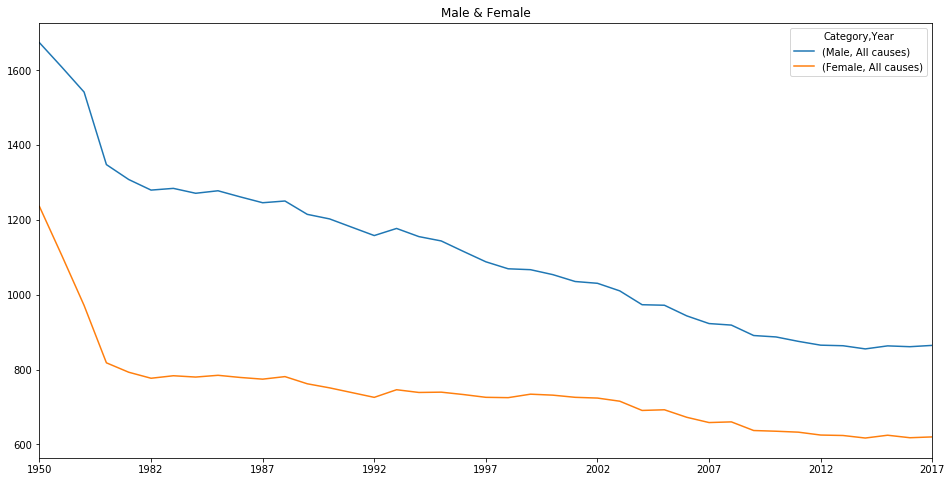

In [8]:
ax = df[[('Male','All causes'),('Female','All causes')]].plot(title = "Male & Female", figsize=(16,8))

In [9]:
df_corr = df['All Persons'].drop(('All causes'),axis =1).corr()

#plt.figure(figsize = (20,20))
#sns.heatmap(df_corr, annot = True)
#plt.ylim(19,0)

df_corr

Year,Diseases of heart,Ischemic heart disease,Cerebrovascular diseases,Malignant neoplasms,"Trachea, bronchus, and lung","Colon, rectum, and anus","Chronic lower respiratory diseases6/,7/",Influenza and pneumonia7/,Chronic liver disease and cirrhosis,Diabetes mellitus8/,Alzheimer's disease9/,Human immunodeficiency virus (HIV) disease,Unintentional injuries,Motor vehicle-related injuries,Poisoning,"Nephritis, nephrotic syndrome and nephrosis8/",Suicide10/,Homicide10/
Year,,,,,,,,,,,,,,,,,,
Diseases of heart,1.000000,0.998730,0.944610,0.652930,-0.261485,0.972209,-0.817914,0.902091,0.720488,-0.288371,-0.857622,0.752855,0.567777,0.948151,-0.770030,-0.809093,0.237711,0.455488
Ischemic heart disease,0.998730,1.000000,0.985200,0.882813,0.607506,0.988861,-0.827309,0.836459,0.762292,-0.580639,-0.879636,0.763854,-0.167766,0.952597,-0.876848,-0.802774,0.054615,0.868052
Cerebrovascular diseases,0.944610,0.985200,1.000000,0.419640,-0.508993,0.839299,-0.797586,0.824175,0.662696,-0.076240,-0.825591,0.721362,0.757842,0.885394,-0.592263,-0.755541,0.231247,0.200107
Malignant neoplasms,0.652930,0.882813,0.419640,1.000000,0.547953,0.864225,-0.508947,0.760491,0.330032,-0.238027,-0.903782,0.809335,-0.216982,0.674011,-0.951462,-0.751724,-0.216857,0.772528
"Trachea, bronchus, and lung",-0.261485,0.607506,-0.508993,0.547953,1.000000,0.233964,-0.123387,-0.048817,-0.279594,-0.054988,-0.882246,0.756911,-0.912508,-0.154551,-0.365736,-0.509780,-0.517827,0.512421
"Colon, rectum, and anus",0.972209,0.988861,0.839299,0.864225,0.233964,1.000000,-0.751174,0.901134,0.702474,-0.385873,-0.886770,0.770107,0.185644,0.930693,-0.904966,-0.799649,0.061482,0.729995
"Chronic lower respiratory diseases6/,7/",-0.817914,-0.827309,-0.797586,-0.508947,-0.123387,-0.751174,1.000000,-0.517288,-0.939255,0.849665,-0.693496,-0.430938,-0.284825,-0.756843,0.510024,0.703258,-0.468290,-0.750493
Influenza and pneumonia7/,0.902091,0.836459,0.824175,0.760491,-0.048817,0.901134,-0.517288,1.000000,0.515304,-0.147928,-0.832632,0.805668,0.355725,0.855509,-0.819693,-0.859800,0.126771,0.494088
Chronic liver disease and cirrhosis,0.720488,0.762292,0.662696,0.330032,-0.279594,0.702474,-0.939255,0.515304,1.000000,-0.513181,0.583506,0.223021,0.489234,0.763696,-0.401693,-0.642886,0.542533,0.533986


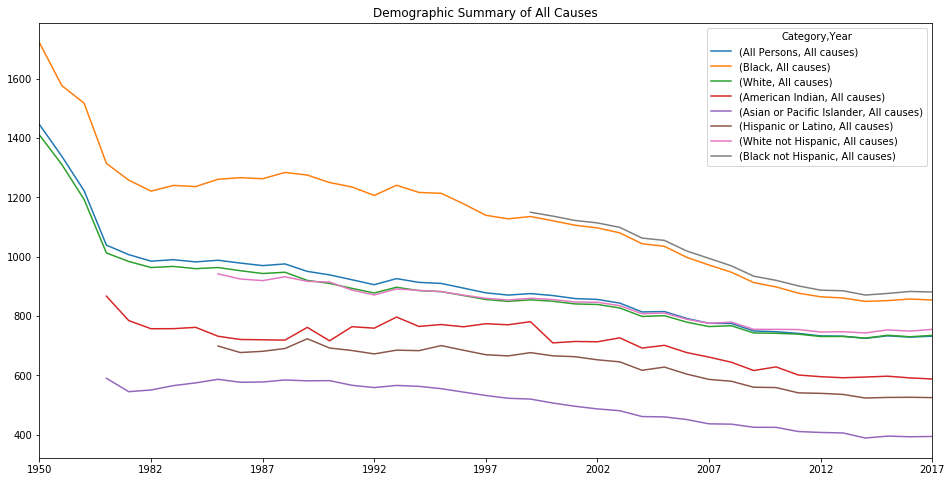

In [10]:
ax = df[[('All Persons','All causes'),('Black','All causes'),('White','All causes'),
         ('American Indian','All causes'),('Asian or Pacific Islander','All causes'),
         ('Hispanic or Latino','All causes'),('White not Hispanic','All causes'),
         ('Black not Hispanic','All causes')
        ]].plot(title = "Demographic Summary of All Causes", figsize=(16,8))

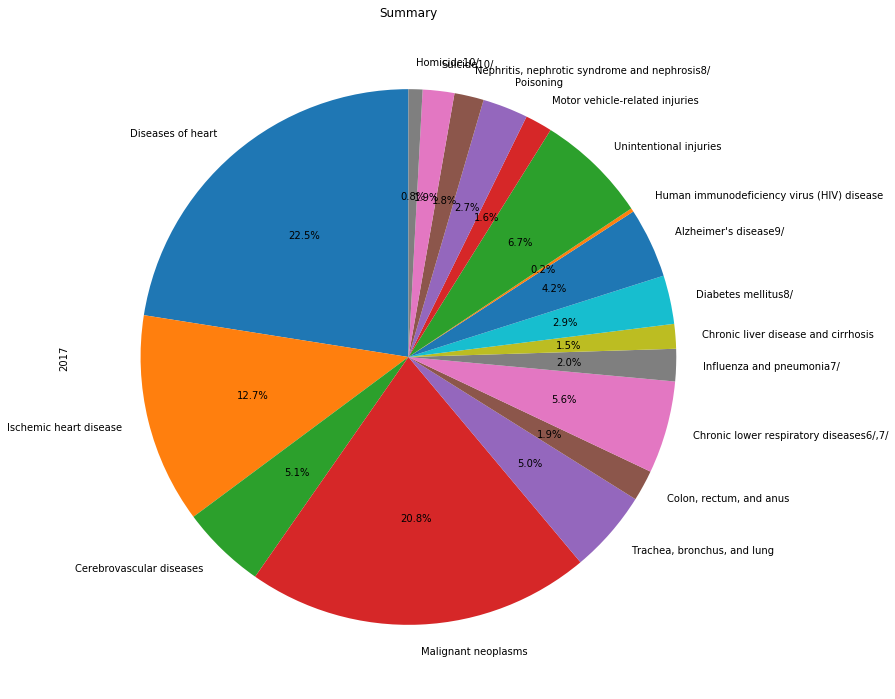

In [11]:
ax = df['All Persons'].drop(('All causes'),axis =1).loc['2017'].plot(
    kind = 'pie',title = "Summary",startangle =90, autopct = lambda x:'%0.1f%%'%x, 
    figsize=(12,14))

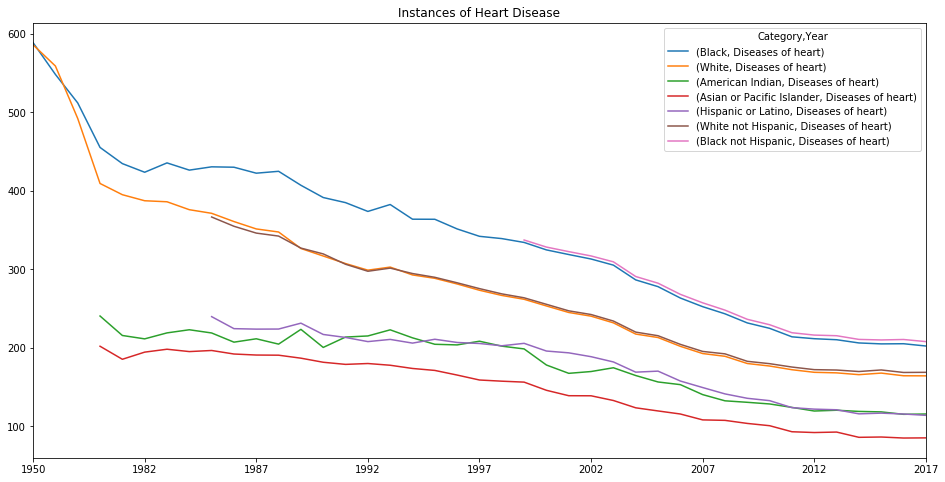

In [12]:
ax = df[[('Black','Diseases of heart'),('White','Diseases of heart'),('American Indian','Diseases of heart'),
         ('Asian or Pacific Islander','Diseases of heart'),('Hispanic or Latino','Diseases of heart'),
         ('White not Hispanic','Diseases of heart'),('Black not Hispanic','Diseases of heart')
        ]].plot(title = "Instances of Heart Disease", figsize=(16,8))

(18, 0)

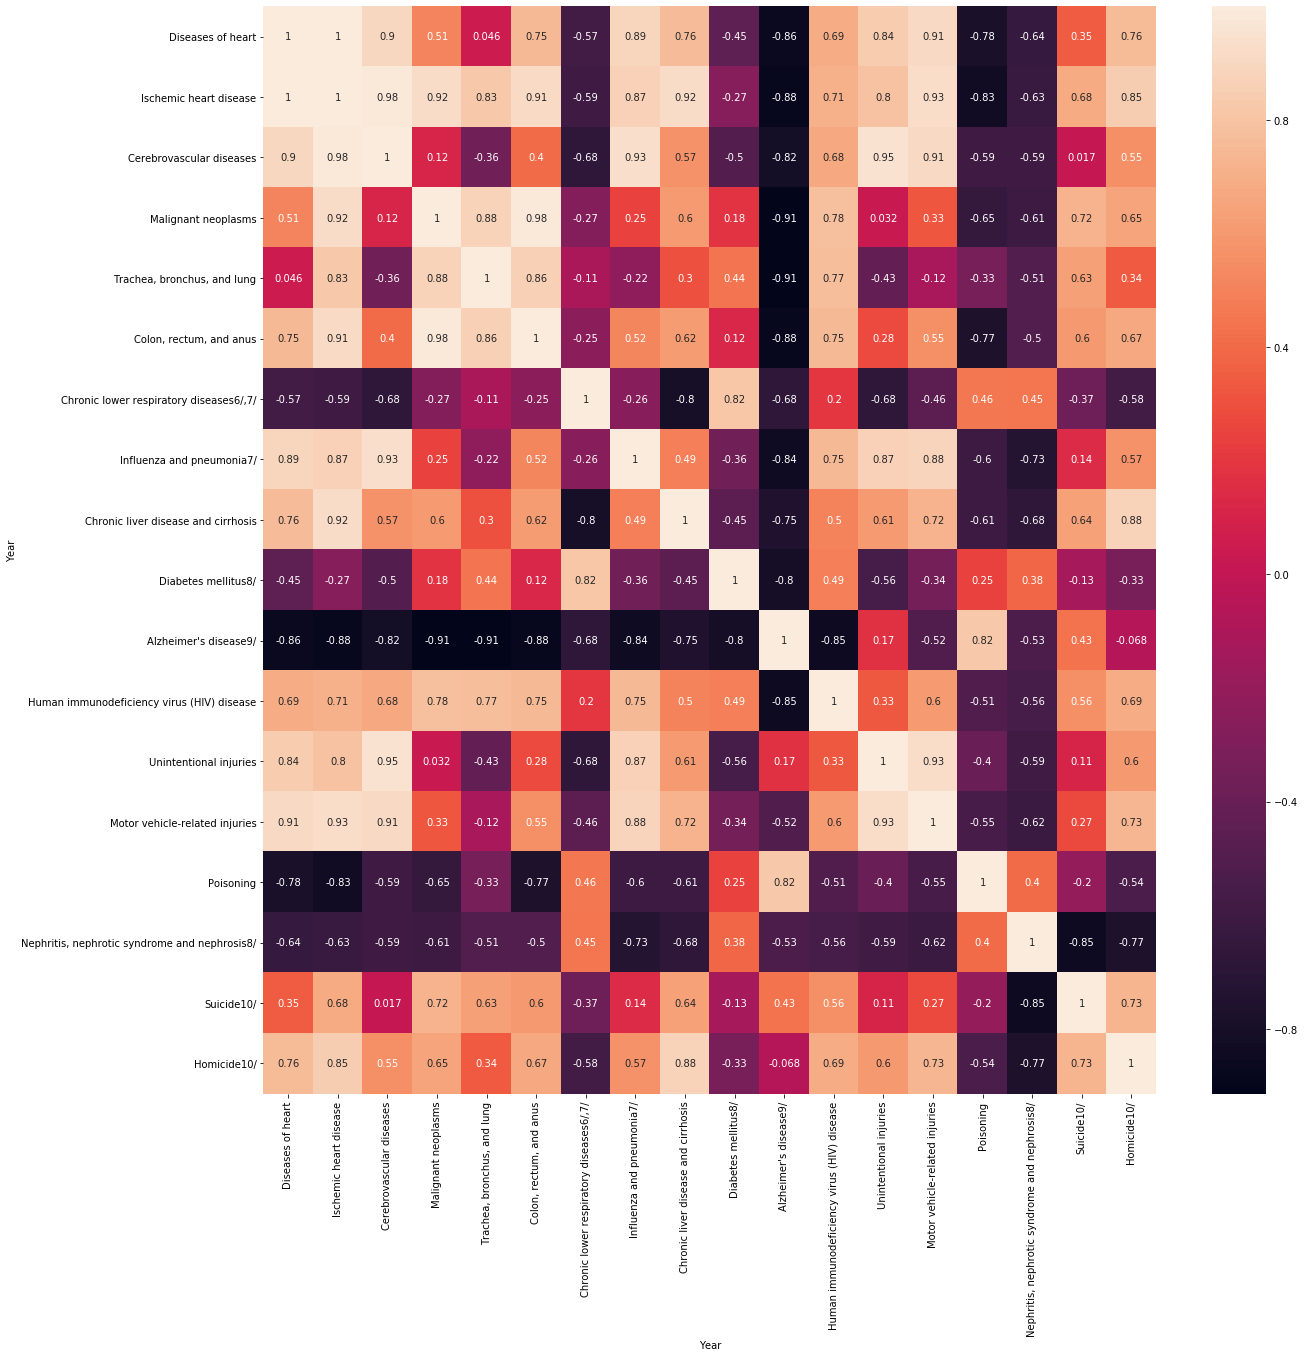

In [13]:
df_corr = df['Black'].drop(('All causes'),axis =1).corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot = True)
plt.ylim(18,0)

#df_corr

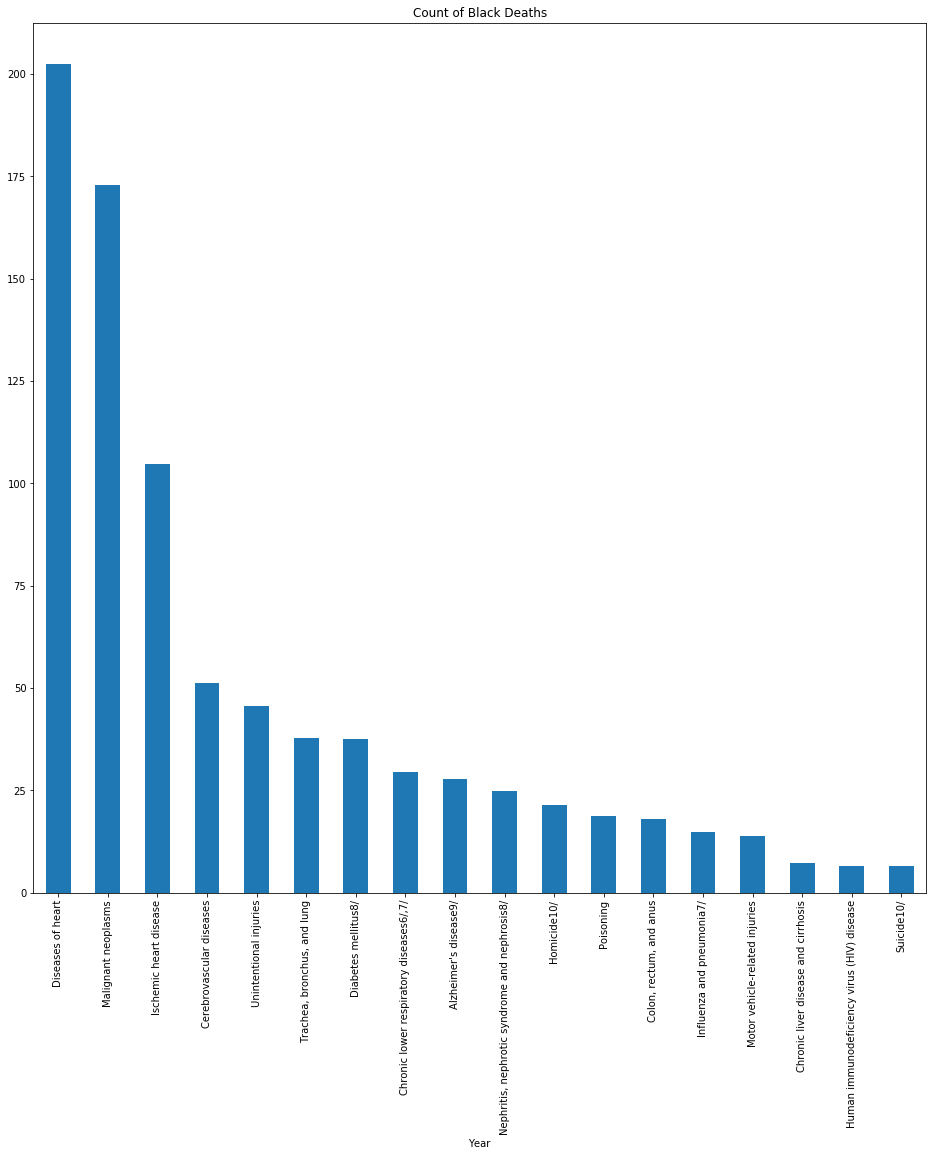

In [14]:
ax = df['Black'].drop(('All causes'),axis =1).loc['2017'].nlargest(18).plot(
    kind = 'bar',title = 'Count of Black Deaths',figsize=(16,16))

In [15]:
#df['Black','Diseases of heart']

In [16]:
X = df['Black','Diseases of heart'].values.reshape(-1,1)
y = df['Black','Diseases of heart'].values.reshape(-1,1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
len(X_train)

28

In [23]:
len(X_test)

13

In [24]:
length = 12
generator = TimeseriesGenerator(X_train,y_train,length = length, batch_size=1)

In [25]:
X,y = generator[0]

In [26]:
len(X[0])

12

In [27]:
y

array([[339.2]])

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,LSTM

In [30]:
n_features = 1

In [31]:
model = Sequential()
model.add(LSTM(128,activation = 'relu',input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss',patience =2)

In [35]:
validation_generator = TimeseriesGenerator(X_test,y_test,length = length, batch_size=1)

In [56]:
model.fit_generator(generator,epochs = 8, validation_data = validation_generator, 
                    callbacks = [early_stop])

Epoch 1/8
16/16 [==============================] - 11s 716ms/step - loss: 12905.6356 - val_loss: 2346.5286
Epoch 2/8
16/16 [==============================] - 11s 691ms/step - loss: 8737.8991 - val_loss: 3756.3755
Epoch 3/8
16/16 [==============================] - 11s 682ms/step - loss: 9320.9206 - val_loss: 8858.9180


In [54]:
losses = pd.DataFrame(model.history.history)

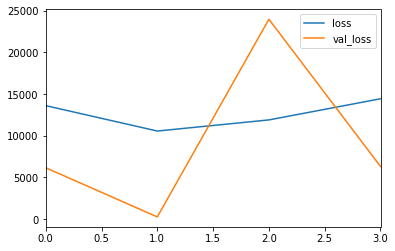

In [55]:
losses.plot()

In [39]:
test_predictions = []

first_eval_batch = X_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(X_test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [40]:
true_predictions = scaler.inverse_transform(test_predictions)

In [49]:
true_predictions

array([[1.26233633e+05],
       [1.00594782e+05],
       [6.71179378e+04],
       [6.76387911e+04],
       [1.48745081e+05],
       [3.43132777e+05],
       [8.73528845e+05],
       [2.26270937e+06],
       [5.89211380e+06],
       [1.53707185e+07],
       [4.01712167e+07],
       [1.05124299e+08],
       [2.75343826e+08]])

In [42]:
BHD = df['Black','Diseases of heart']

In [43]:
TP = true_predictions

In [44]:
df2=df['Black','Diseases of heart'].tail(13)

In [45]:
df3 = pd.DataFrame(columns = ['True','Pred'])
df3['True'] = df2
df3['Pred']= true_predictions
df3

,True,Pred
2005,278.0,1.262336e+05
2006,263.5,1.005948e+05
2007,252.5,6.711794e+04
2008,243.4,6.763879e+04
2009,231.8,1.487451e+05
2010,224.9,3.431328e+05
2011,214.1,8.735288e+05
2012,211.7,2.262709e+06
2013,210.4,5.892114e+06
2014,206.3,1.537072e+07


In [46]:
value=str('7.046268e+04')
value2=value. replace(',', '. ')
float(value2)

70462.68

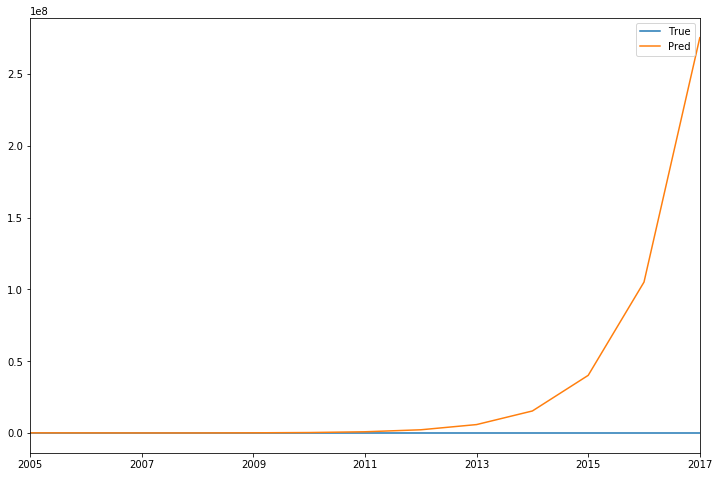

In [47]:
df3.plot(figsize = (12,8))